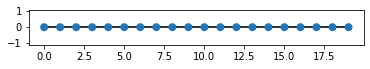

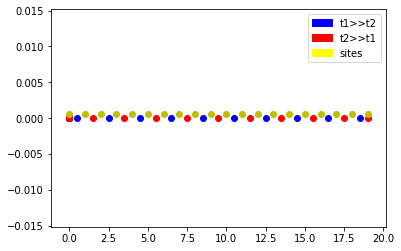

In [2]:
import kwant
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import scipy.sparse.linalg as sla
from scipy.linalg import eig
import scipy

lat = kwant.lattice.chain(norbs=1)
bulk = kwant.Builder(symmetry=kwant.lattice.TranslationalSymmetry([2]))

def onsite(site):
    return 0 

def hopping_intra(site1, site2, t1):
    return t1

def hopping_inter(site1, site2, t2):
    return t2

bulk[lat(0)] = onsite
bulk[lat(1)] = onsite
bulk[lat(0),lat(1)] = hopping_intra
bulk[lat(1),lat(2)] = hopping_inter

finite = kwant.Builder()

L = 20

def shape(site):
    pos=site.pos
    return 0<=pos[0]<L

finite.fill(bulk, shape, start=[0]);

finite = finite.finalized()

kwant.plot(finite)

#######################

params_1 = dict(t1=100, t2=1)

ham_1 = finite.hamiltonian_submatrix(params = params_1)

evals_1, evecs_1 = np.linalg.eigh(ham_1)
evecs_1, _ = np.linalg.qr(evecs_1)
P1 = np.zeros((20,20))

P1 = (evecs_1) @ np.diag(evals_1 < 0) @ evecs_1.conj().T

x = np.diag([s.pos[0] for s in finite.sites])

X1 = P1@x@P1

evals1, evecs1 = np.linalg.eigh(X1)
evecs1, _ = np.linalg.qr(evecs1)
evals1 = evals1[evals1 > 0]

order1 = np.argsort(evals1)

######################

params_2 = dict(t1=1, t2=100)

ham_2 = finite.hamiltonian_submatrix(params = params_2)

evals_2, evecs_2 = np.linalg.eigh(ham_2)
evecs_2, _ = np.linalg.qr(evecs_2)
P2 = np.zeros((20,20))

P2 = (evecs_2) @ np.diag(evals_2 < 0) @ evecs_2.conj().T

X2 = P2@x@P2



evals2, evecs2 = np.linalg.eigh(X2)
evecs2, _ = np.linalg.qr(evecs2)
evals2 = evals2[evals2 > 0]

order2 = np.argsort(evals2)

#####################


np.allclose(evecs2.T.conj() @ evecs2, np.eye(evecs2.shape[0]))


plt.scatter(evals1[order1], np.zeros((len(evals1), )), c = 'b')
    
plt.scatter(evals2[order2], np.zeros((len(evals2), )), c = 'r')    

y = np.zeros(20)
for i in range(20):
    y[i] = 0.0005

plt.scatter([s.pos[0] for s in finite.sites], y, c = 'y')

red_patch = mpatches.Patch(color='red', label='t2>>t1')
blue_patch = mpatches.Patch(color='blue', label='t1>>t2')
yellow_patch = mpatches.Patch(color='yellow', label = 'sites')


plt.legend(handles=[blue_patch, red_patch, yellow_patch])



plt.show()